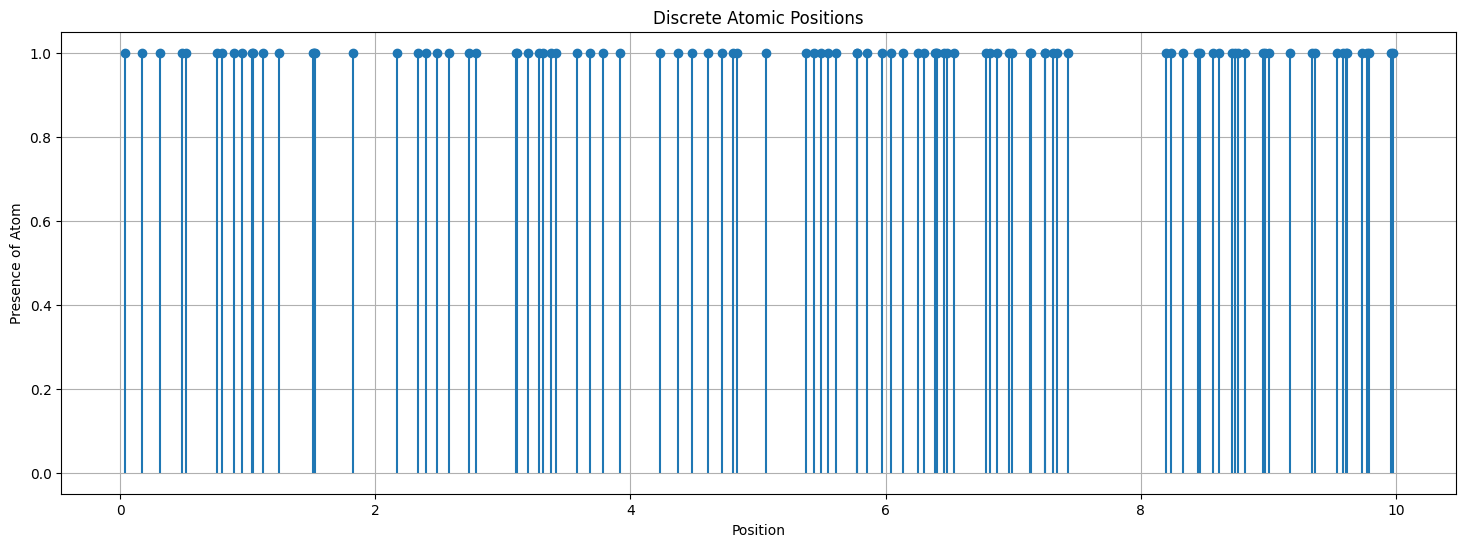

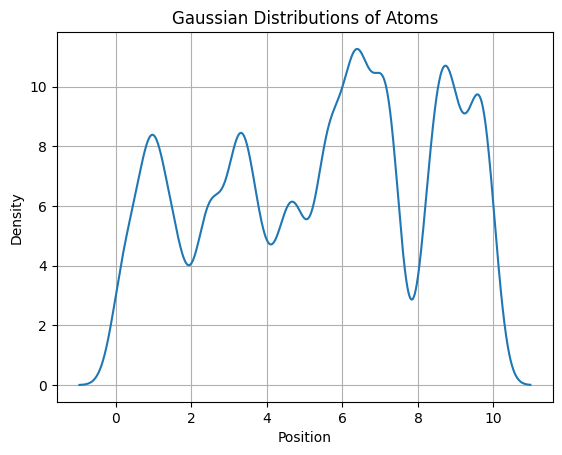

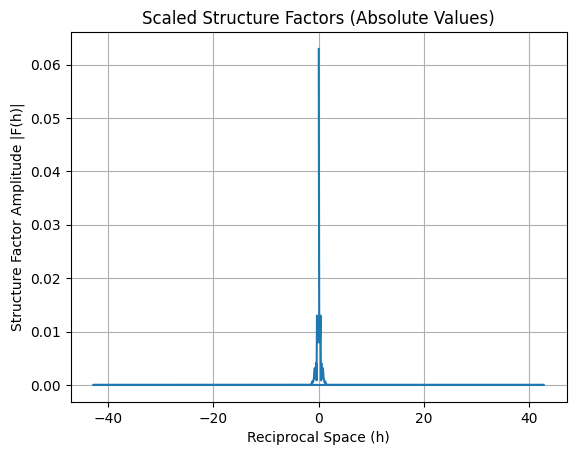

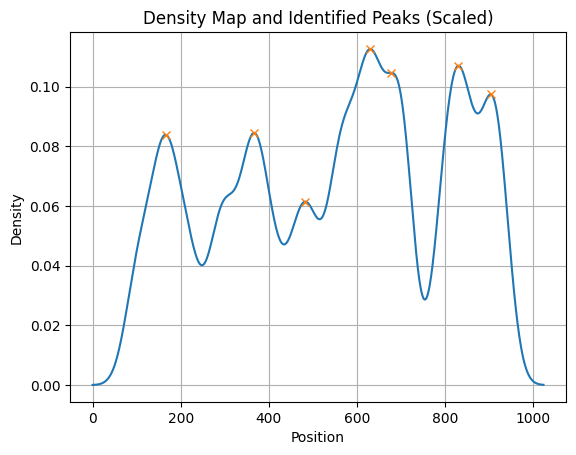

array([166, 366, 483, 630, 677, 830, 903])

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, ifft

#### INPUT ####
# Set the number of atoms
num_atoms = 100
# Generate random atomic positions for the specified number of atoms
atomic_positions = np.sort(np.random.rand(num_atoms) * 10)
###############

#Convert atoms into gaussians with specified sigma
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

N = 1024
sigma = 0.3
x_range = np.linspace(min(atomic_positions) - 1, max(atomic_positions) + 1, N)
h = np.fft.fftfreq(N, d=(max(x_range) - min(x_range)) / N)
atom_distributions = np.zeros(N)
for pos in atomic_positions:
    atom_distributions += gaussian(x_range, pos, sigma)

#Scale for the structure factor by 1/num_atoms is normalisation ??
scale_factor = 1 / num_atoms
F_h_gaussian = ifft(atom_distributions, N) 
F_h_scaled = F_h_gaussian * scale_factor

rho_x_scaled = fft(F_h_scaled, N)

peaks_scaled, _ = find_peaks(np.real(rho_x_scaled))

plt.figure(figsize=(18, 6))

plt.subplot(1, 1, 1)
plt.stem(atomic_positions, np.ones_like(atomic_positions), basefmt=" ")
plt.title('Discrete Atomic Positions')
plt.xlabel('Position')
plt.ylabel('Presence of Atom')
plt.grid(True)
plt.show()

plt.subplot(1, 1, 1)
plt.plot(x_range, atom_distributions)
plt.title('Gaussian Distributions of Atoms')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(True)
plt.show()

plt.subplot(1, 1, 1)
plt.plot(h, np.abs(F_h_scaled))
plt.title('Scaled Structure Factors (Absolute Values)')
plt.xlabel('Reciprocal Space (h)')
plt.ylabel('Structure Factor Amplitude |F(h)|')
plt.grid(True)
plt.show()

plt.subplot(1, 1, 1)
plt.plot(np.real(rho_x_scaled))
plt.plot(peaks_scaled, np.real(rho_x_scaled)[peaks_scaled], "x")
plt.title('Density Map and Identified Peaks (Scaled)')
plt.xlabel('Position')
plt.ylabel('Density')
plt.grid(True)
plt.show()

peaks_scaled
